# Домашнее задание 5. Градиентный спуск

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [636]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [637]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [638]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        l = y.shape[0]
        return 2/l * X.T.dot(X.dot(w) - y)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [639]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [640]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    trace = np.zeros((n_iterations + 1, w_init.size))
    trace[0] = w_init # начальное значение весов
    w = w_init # для удобства в цикле 
    
    for i in range(n_iterations):
        grad = loss.calc_grad(X, y, w)
        w = w - lr * grad
        trace[i + 1] = w
    return trace

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [641]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [642]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [643]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

0.0001


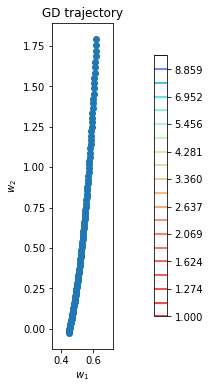

0.001


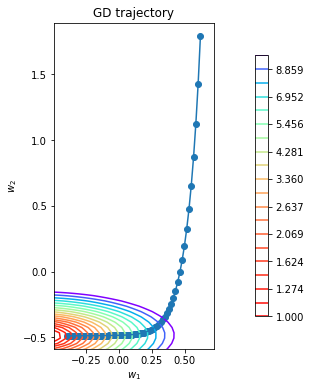

0.005


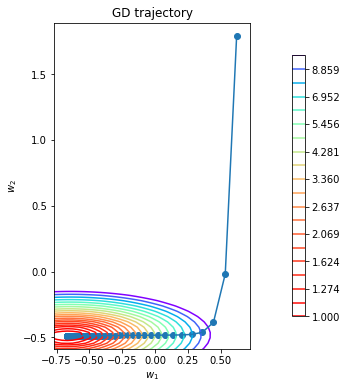

0.01


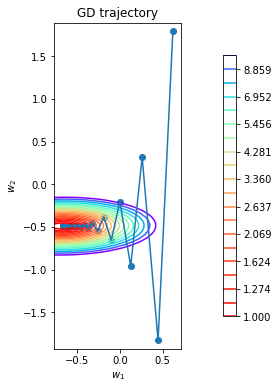

In [644]:
loss = MSELoss()

for lr in [0.0001, 0.001, 0.005, 0.01]:
    print(lr)
    w_list = gradient_descent(w_init, X, y, loss, lr, 100)
    plot_gd(w_list, X, y, loss)

Вывод! Как видим, самое маленькое lr к минимуму даже не приблизилось, lr поменьше приблизилось, но дойти не успело. Минимум хорошо найдется, т.к. мы ничего не перескочим, но времени потратится очень много. Скорее всего, столько ждать нам в общем совсем не  хочется. Большие lr наоборот смещается сильнее, но может что-нибудь перескочить, что нам не нравится. Но идет быстрее.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [645]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    trace = np.zeros((n_iterations + 1, w_init.size))
    trace[0] = w_init # начальное значение весов
    w = w_init # для удобства в цикле 
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size) # случайные числа-индексы X
        stoc_grad = loss.calc_grad(X[batch_indices], y[batch_indices], w)
        w = w - lr * stoc_grad
        trace[i + 1] = w
    return trace

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

0.0001 1


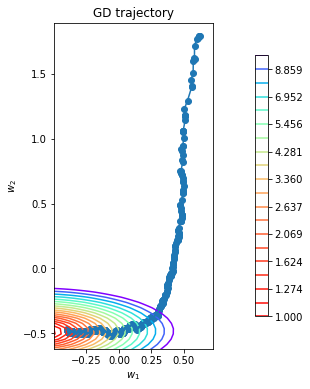

0.0001 10


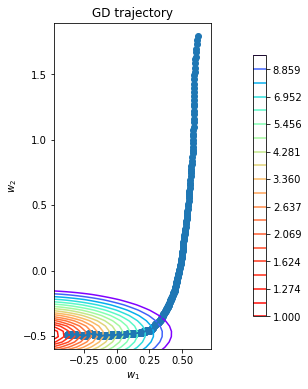

0.0001 75


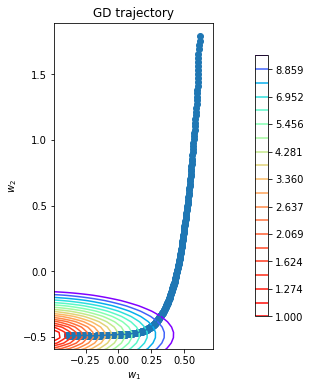

0.0001 150


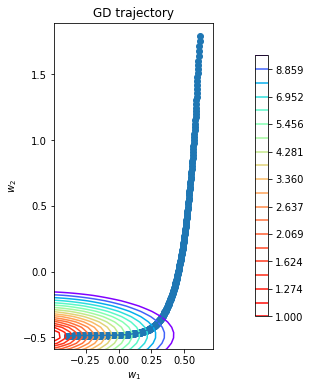

0.0005 1


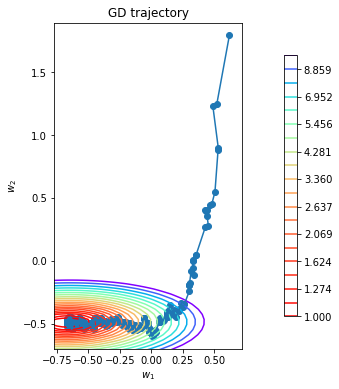

0.0005 10


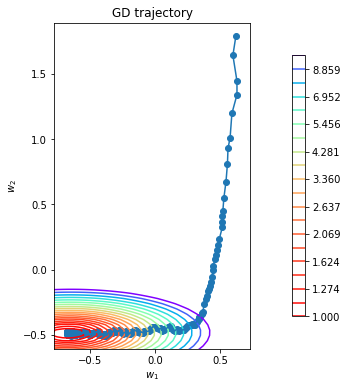

0.0005 75


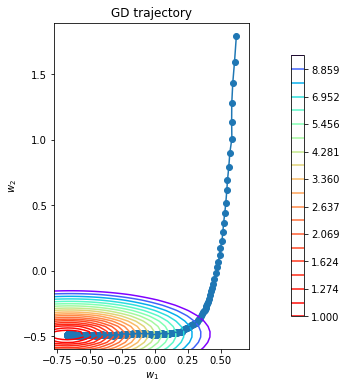

0.0005 150


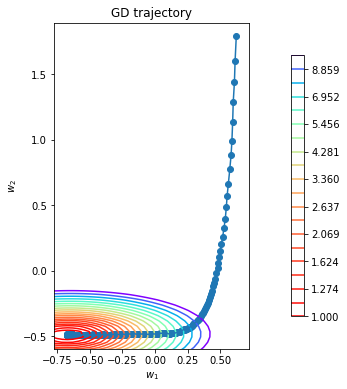

0.005 1


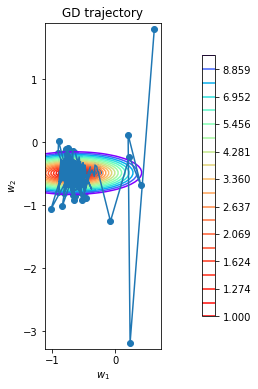

0.005 10


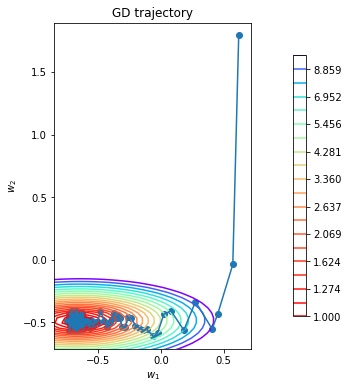

0.005 75


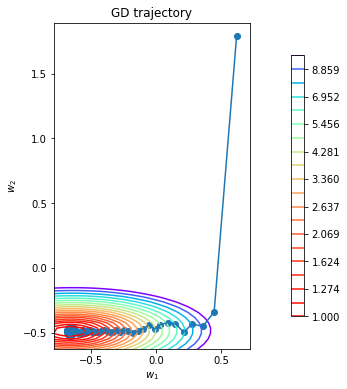

0.005 150


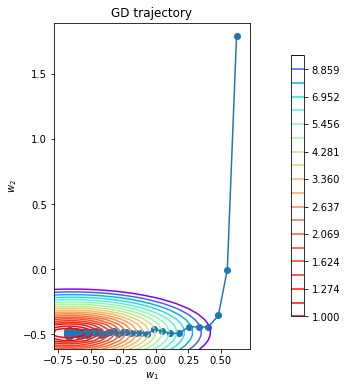

0.01 1


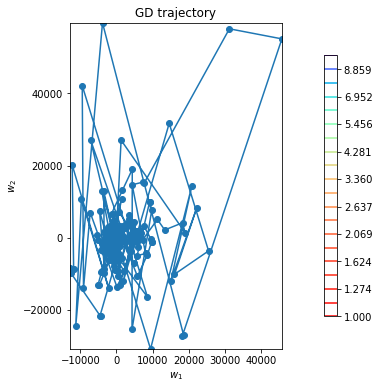

0.01 10


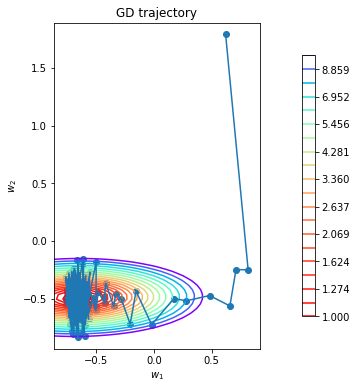

0.01 75


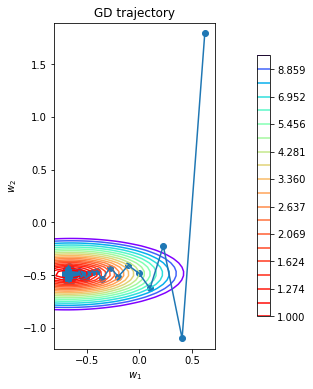

0.01 150


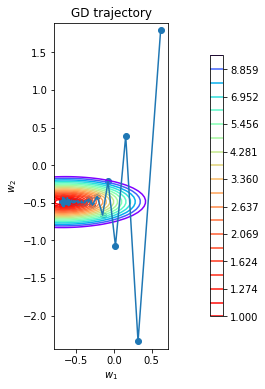

In [646]:
loss = MSELoss()

for lr in [0.0001, 0.0005, 0.005, 0.01]:
    for batch_size in [1, 10, 75, 150]:
        print(lr, batch_size)
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size)
        plot_gd(w_list, X, y, loss)

Мои выводы! Про lr мы уже поняли: когда lr маленький, мы движемся маленькими шагами, поэтому за определенное число шагов все равно дойдем до нужного, потому что мы двигаемся очень-очень аккуратно. Когда lr большой, мы можем перескакивать минимум и в итоге болтаться вокруг да около. 

Чем меньше число элементов, за которыми мы следим, т.е. batch_size, тем более нас колбасит. Чем больше, тем более ровно мы двигаемся.

Как видим, когда barch_size маленький, а lr большой, происходит не лучшее сочетание, не приводящее к цели (barch_size = 1 и lr = 0.005 или 0.01 тому подтверждения). А когда barch_size большой, а lr маленький, то все наоборот плавно и приходит к цели (например, barch_size = 150, lr = 0.005). Но, конечно, мы жертвуем временем.

Чем отличается поведение стохастического градиентного спуска от обычного? Т.к. в обычном мы смотрим по всем элементам, в целом мы всегда движемся в нужном направлении. В стохастическом нас иногда отклоняет от курса, т.к. мы смотрим не на все, а выбираем случайно, но в конечном итоге, если число шагов не сверхмаленькое, мы все равно движемся в нужную сторону (особенно если barch_size не 1, а lr не 0.01). Но стохастический спуск получается быстрее, и при адекватных настройках мы все равно доходим до цели (а при неадекватно большом шаге и в обычном спуске мы можем пропустить минимум).

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [647]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    trace = np.zeros((n_iterations + 1, w_init.size))
    trace[0] = w_init # начальное значение весов
    w = w_init # для удобства в цикле 
    
    for i in range(1, n_iterations + 1):
        batch_indices = np.random.choice(X.shape[0], size=batch_size) # случайные числа-индексы X
        stoc_grad = loss.calc_grad(X[batch_indices], y[batch_indices], w)
        new_lr = lr * (1/(1 + i))**p
        w = w - new_lr * stoc_grad
        trace[i] = w
    return trace

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

0.1


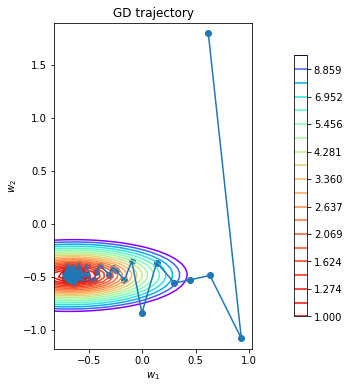

0.3


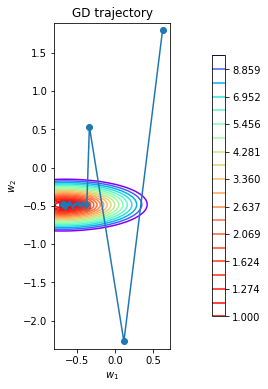

0.5


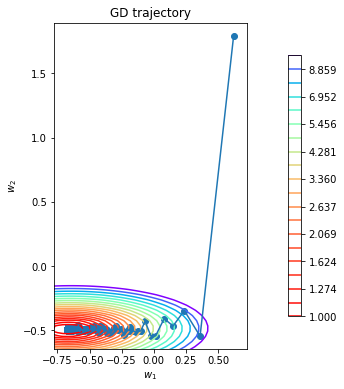

0.7


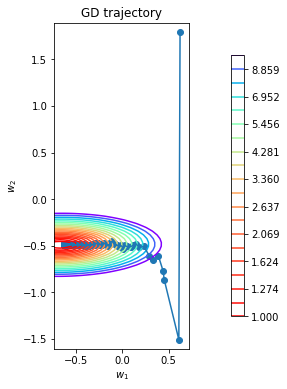

1


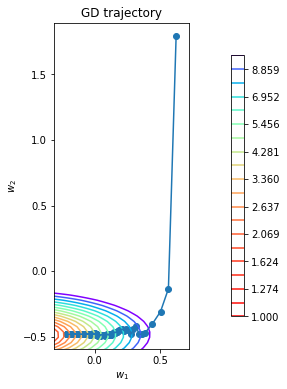

In [214]:
loss = MSELoss()

for p in [0.1, 0.3, 0.5, 0.7, 1]:
    print(p)
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p)
    plot_gd(w_list, X, y, loss)

Номер шага всегда больше 1, т.е. \\(t > 1\\). Поэтому \\(1 + t > 1\\). Значит, \\(\frac{1}{1 + t} > 1\\). 

Получается, \\(\left(\frac{1}{1 + t}\right)^{p_1} < \left(\frac{1}{1 + t}\right)^{p_2} \Leftrightarrow p_1 > p_2\\). Значит, если зафиксируем конкретный номер шага, то длина шага при меньшем p будет больше длины шага при большем. 

Давайте посмотрим, правда ли, что шаг при \\(p_1 < p_2\\) убывает медленнее, чем при \\(p_2\\). 

$$ \left(\left(\frac{1}{1 + x}\right)^p\right)' = -p\left(\frac{1}{1 + x}\right)^{p - 1} \cdot \frac{1}{(1 + x)^2} = -p\left(\frac{1}{1 + x}\right)^{p - 3}.$$

Сравним скорости роста при \\(p_1, p_2\\) и определим, что больше, если 

$$-p_1\left(\frac{1}{1 + x}\right)^{p_1 - 3} < -p_2\left(\frac{1}{1 + x}\right)^{p_2 - 3}$$

$$p_1\left(\frac{1}{1 + x}\right)^{p_1 - 3} > p_2\left(\frac{1}{1 + x}\right)^{p_2 - 3}$$

$$\frac{p_1}{p_2} > \left(\frac{1}{1 + x}\right)^{p_2 - p_1}$$

$$\left(\frac{1}{1 + x}\right)^{\log_{\frac{1}{1 + x}}\frac{p_1}{p_2}} > \left(\frac{1}{1 + x}\right)^{p_2 - p_1}$$

$$\log_{\frac{1}{1 + x}}\frac{p_1}{p_2} > p_2 - p_1$$

$$\log_{\frac{1}{1 + x}}p_1 + p_1 > p_2 + \log_{\frac{1}{1 + x}} p_2$$

Можно было бы доказать, если бы функция $f(t) = \log_{\frac{1}{1 + x}}t + t$ была монотонной, но это не так. График этой функции до определенного момента убывает, потом возрастает. Поэтому до этого определенного момента (брутфорсом p = 0.621) шаг при увеличении p медленнее уменьшается. Потом, если сравнивать только p больше этого определенного момента, быстрее уменьшается. А сравнивать p не на промежутке монотонности давайте не будем.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [884]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        n = X.shape[1]
        w_init = np.zeros(n)
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_T = self.w.T # т.к. мы для удобства делали строчку, а не столбец
        return X.dot(w_T)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [885]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [893]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [894]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [895]:
from sklearn.impute import SimpleImputer

In [896]:
# делим на трейн и тест
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)

In [897]:
cat_features_mask = (X_raw.dtypes == 'object').values

# вещественные заполняем средним
X_real_train = X_train[X_train.columns[~cat_features_mask]]
X_real_test = X_test[X_test.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real_train = pd.DataFrame(data=mis_replacer.fit_transform(X_real_train), columns=X_real_train.columns, 
                                  index=X_real_train.index) # обучились на трейне (и сразу заполнили пропуски)
X_no_mis_real_test = pd.DataFrame(data=mis_replacer.transform(X_real_test), columns=X_real_test.columns, 
                                  index=X_real_test.index) # только заполнили пропуски на трейне 

# нормализуем числовые признаки
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_no_mis_real_train) # обучились на трейне
#X_no_mis_real_train = pd.DataFrame(scaler.transform(X_no_mis_real_train), columns=X_real_train.columns)
X_no_mis_real_train = pd.DataFrame(scaler.transform(X_no_mis_real_train), index=X_real_train.index)
#X_no_mis_real_test = pd.DataFrame(scaler.transform(X_no_mis_real_test), columns=X_real_test.columns)
X_no_mis_real_test = pd.DataFrame(scaler.transform(X_no_mis_real_test), index=X_real_test.index)

In [898]:
# заполняем категориальные и кодируем (дальше много мусора, т.к. я сначала это сделала неправильно, а теперь поняла, что
# лучше всего все объединить, закодировать, а потом снова поделить, прошу, простите за мусор...)

X_not_real_train = X_train[X_train.columns[cat_features_mask]].fillna('')
X_not_real_test = X_test[X_test.columns[cat_features_mask]].fillna('')

X_not_real = pd.concat([X_not_real_train, X_not_real_test], axis=0) # приписала одной таблице снизу другую
X_not_real = pd.get_dummies(X_not_real, drop_first=True)

X_train = X_not_real[0:X_train.shape[0]] # стапые нам не нужны, так что назовем эти удобно
X_test = X_not_real[X_train.shape[0]:]

In [899]:
# склеиваем категориальные и вещественные
X_no_mis_train = pd.concat([X_no_mis_real_train, X_not_real_train], axis=1)
X_no_mis_test = pd.concat([X_no_mis_real_test, X_not_real_test], axis=1)

### ТУТ ДАЛЬШЕ МУСОР НО МНЕ ЖАЛКО ЕГО УДАЛЯТЬ Я ПОТРАТИЛА НА НЕГО 12 ЧАСОВ

In [824]:
columns_train = [el for el in X_not_real_train.columns if el not in X_not_real_test.columns]

In [825]:
columns_train_dict = [[columns_train[i], np.zeros(X_no_mis_test.shape[0])] for i in range(len(columns_train))]

In [826]:
columns_train_dict = pd.DataFrame(dict(columns_train_dict))

In [827]:
columns_train_dict

,2_audi,2_bmw,2_chevrolet,2_jaguar,2_renault,5_four,15_three,15_twelve,17_mfi,17_spfi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [828]:
X_no_mis_test = X_no_mis_test.reset_index(drop = True)

In [829]:
new_X_no_mis_test = X_no_mis_test.join(columns_train_dict)

In [830]:
# теперь то же самое с train)))

columns_test = [el for el in X_not_real_test.columns if el not in X_not_real_train.columns]

In [831]:
columns_test_dict = [[columns_test[i], np.zeros(X_no_mis_train.shape[0])] for i in range(len(columns_test))]

In [832]:
columns_test_dict = pd.DataFrame(dict(columns_test_dict))

In [833]:
columns_test_dict

,2_mercury
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
135,0.0
136,0.0
137,0.0
138,0.0


In [834]:
X_no_mis_train = X_no_mis_train.reset_index(drop = True)

In [835]:
new_X_no_mis_train = X_no_mis_train.join(columns_test_dict)

In [836]:
new_X_no_mis_train

,0,1,2,3,4,5,6,7,8,9,...,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi,2_mercury
0,-0.331166,1.776532,0.900873,-0.504828,-0.210495,-0.322969,-1.857406,-0.525851,-0.199274,-0.019052,...,0,0,1,0,0,0,0,0,0,0.0
1,1.455248,0.961074,-0.858691,-0.346291,-0.315975,-0.276162,0.717216,-0.579206,-0.497285,-0.666251,...,0,0,0,0,0,0,1,0,0,0.0
2,-0.197603,0.145617,0.155295,-0.790195,-0.835258,-1.071882,0.226812,-1.362388,-0.772372,-0.828051,...,0,0,1,0,0,0,0,0,0,0.0
3,1.505334,-0.669840,0.000000,0.145175,0.373699,0.379137,0.472014,0.108698,0.121661,-0.666251,...,0,0,0,0,0,0,1,0,0,0.0
4,-1.366285,0.145617,-0.739398,-0.790195,-1.597956,-1.165496,-0.794864,-1.390972,-0.932840,-1.313449,...,0,0,1,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.804125,-0.669840,-1.127099,-0.409706,-0.161812,-0.322969,0.390280,0.087737,-0.520209,1.073095,...,0,0,0,0,0,0,1,0,0,0.0
136,-1.683498,1.776532,0.000000,-1.725566,-0.551275,-0.931461,-2.102608,-0.106629,-0.015883,0.466346,...,0,0,0,0,0,0,1,0,0,0.0
137,-0.114125,0.145617,0.155295,-0.790195,-0.835258,-1.071882,0.226812,-1.244244,-0.772372,-0.828051,...,0,0,1,0,0,0,0,0,0,0.0
138,-0.882116,-0.669840,0.000000,2.142745,1.947777,1.642929,-0.467927,2.786000,2.918379,1.113545,...,0,0,0,0,0,0,1,0,0,0.0


Проверим, все ли сработало.

In [837]:
new_X_no_mis_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 66 columns):
0                  140 non-null float64
1                  140 non-null float64
2                  140 non-null float64
3                  140 non-null float64
4                  140 non-null float64
5                  140 non-null float64
6                  140 non-null float64
7                  140 non-null float64
8                  140 non-null float64
9                  140 non-null float64
10                 140 non-null float64
11                 140 non-null float64
12                 140 non-null float64
13                 140 non-null float64
14                 140 non-null float64
15                 140 non-null float64
2_audi             140 non-null uint8
2_bmw              140 non-null uint8
2_chevrolet        140 non-null uint8
2_dodge            140 non-null uint8
2_honda            140 non-null uint8
2_isuzu            140 non-null uint8
2_jaguar           140 non-

In [838]:
new_X_no_mis_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 66 columns):
0                  61 non-null float64
1                  61 non-null float64
2                  61 non-null float64
3                  61 non-null float64
4                  61 non-null float64
5                  61 non-null float64
6                  61 non-null float64
7                  61 non-null float64
8                  61 non-null float64
9                  61 non-null float64
10                 61 non-null float64
11                 61 non-null float64
12                 61 non-null float64
13                 61 non-null float64
14                 61 non-null float64
15                 61 non-null float64
2_dodge            61 non-null uint8
2_honda            61 non-null uint8
2_isuzu            61 non-null uint8
2_mazda            61 non-null uint8
2_mercedes-benz    61 non-null uint8
2_mercury          61 non-null uint8
2_mitsubishi       61 non-null uint8
2_nissan      

### КОНЕЦ МУСОРА

In [900]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 93 to 146
Data columns (total 50 columns):
2_audi             61 non-null uint8
2_bmw              61 non-null uint8
2_chevrolet        61 non-null uint8
2_dodge            61 non-null uint8
2_honda            61 non-null uint8
2_isuzu            61 non-null uint8
2_jaguar           61 non-null uint8
2_mazda            61 non-null uint8
2_mercedes-benz    61 non-null uint8
2_mercury          61 non-null uint8
2_mitsubishi       61 non-null uint8
2_nissan           61 non-null uint8
2_peugot           61 non-null uint8
2_plymouth         61 non-null uint8
2_porsche          61 non-null uint8
2_renault          61 non-null uint8
2_saab             61 non-null uint8
2_subaru           61 non-null uint8
2_toyota           61 non-null uint8
2_volkswagen       61 non-null uint8
2_volvo            61 non-null uint8
3_gas              61 non-null uint8
4_turbo            61 non-null uint8
5_four             61 non-null uint8
5_two  

In [901]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 48
Data columns (total 50 columns):
2_audi             140 non-null uint8
2_bmw              140 non-null uint8
2_chevrolet        140 non-null uint8
2_dodge            140 non-null uint8
2_honda            140 non-null uint8
2_isuzu            140 non-null uint8
2_jaguar           140 non-null uint8
2_mazda            140 non-null uint8
2_mercedes-benz    140 non-null uint8
2_mercury          140 non-null uint8
2_mitsubishi       140 non-null uint8
2_nissan           140 non-null uint8
2_peugot           140 non-null uint8
2_plymouth         140 non-null uint8
2_porsche          140 non-null uint8
2_renault          140 non-null uint8
2_saab             140 non-null uint8
2_subaru           140 non-null uint8
2_toyota           140 non-null uint8
2_volkswagen       140 non-null uint8
2_volvo            140 non-null uint8
3_gas              140 non-null uint8
4_turbo            140 non-null uint8
5_four             140

Все получилось, у нас только числа и нет пропусков. Численные признаки мы предварительно нормализовали.

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [902]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [903]:
from sklearn.metrics import mean_squared_error

y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

error_train = mean_squared_error(y_pred_train, y_train)
error_test = mean_squared_error(y_pred_test, y_test)

print('На обучающей:', error_train)
print('На тестовой:', error_test)

На обучающей: 4872336.7351267915
На тестовой: 6607353.703277829


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (комментарий от меня: смещение по-русски) (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [904]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean() + self.coef * np.square(w[:-1]).sum()
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2/len(y) * X.T.dot(X.dot(w) - y) + 2 * self.coef * (np.append(w[:-1], 0))    
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [905]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [ ]:
# Поделим тестовые данные на тестовые и валидационную выборки. Если не получится улучшения результата на тестовой выборке,
# то не получится --- подбирать коэффициент на тесте, лишь бы подогнать, я не буду

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4)
min_error = error_train

for my_lambda in np.linspace(0, 1, 100):
    model = LinearRegression(MSEL2Loss(my_lambda))
    model.fit(X_val, y_val)
    y_pred_val = model.predict(X_val)
    error = mean_squared_error(y_pred_val, y_val)
    if error < min_error:
        min_error = error
        min_error_lambda = my_lambda

print('Оптимальный коэффициент:', min_error_lambda)

model = LinearRegression(MSEL2Loss(min_error_lambda))
model.fit(X_train, y_train)
print('Улучшение на тесте:', mean_squared_error(model.predict(X_test), y_test) - error_test) 
                            # error_test - ошибка на тесте для обычной регрессии

Возможно, у меня не успеет досчитаться, но я сделала в параллельной вкладке и увидела, что оптимальный коэффициент --- 0. Подбирать на тесте не буду, потому что это бессмысленно, так что добиться улучшения на тесте у меня не вышло.

In [906]:
# это я на трейне сначала подбирала, но, как видите, оптимальным оказался тоже 0

min_error_lambda = 0

# минимальной ошибкой сначала поставим значение при лямбда = 0, т.к. это мы уже знаем
min_error = error_train

for my_lambda in np.linspace(0, 1, 100):
    model = LinearRegression(MSEL2Loss(my_lambda))
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    error = mean_squared_error(y_pred_train, y_train)
    if error < min_error:
        min_error = error
        min_error_lambda = my_lambda

print('Оптимальная лямбда:', min_error_lambda)
print('Улучшение на тесте:', mean_squared_error(model.predict(X_test), y_test) - error_test) 
                            # error_test - ошибка на тесте для обычной регрессии

Оптимальная лямбда: 0
Улучшение на тесте: 8705198.178556077


In [ ]:
model = LinearRegression(MSEL2Loss(0.1))
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
mean_squared_error()

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

Чтобы понять, что надо делать, посмотрим на таком примере:

$$ X = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}, w = \begin{pmatrix} 5 \\ 6 \end{pmatrix}, y= \begin{pmatrix} 3 \\ 4 \end{pmatrix}.$$

Функция потерь:

$$\begin{pmatrix} 1 \cdot 5 + 2 \cdot 6 - 3 \\ 3 \cdot 5 + 4 \cdot 6 - 4 \end{pmatrix} \to \begin{pmatrix} \varphi(14) \\ \varphi(35) \end{pmatrix} \to \text{среднее по строкам}.$$

Градиент:

$$ \begin{pmatrix} 1 \cdot 5 + 2 \cdot 6 - 3 \\ 3 \cdot 5 + 4 \cdot 6 - 4 \end{pmatrix} \to \begin{pmatrix} \varphi_\nabla(14) \\ \varphi_\nabla(35) \end{pmatrix} \to \begin{pmatrix} \varphi_\nabla(14) \cdot \begin{pmatrix} 1 & 2 \end{pmatrix} \\ \varphi_\nabla(35) \cdot \begin{pmatrix} 3 & 4 \end{pmatrix} \end{pmatrix} \to \text{среднее по строкам}. $$

Из этого понятно, как записать в общем виде. Я сначала хотела по-простому, но по-простому не работает, будем с map. Запишем:

In [975]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        
        def phi_eps(z):
            if -1 * self.eps < z < self.eps:
                return (z**2)/2
            return self.eps * (abs(z) - 1/2 * eps)
            
        return np.array(list(map(phi_eps, X.dot(w) - y))).mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        def grad_phi_eps(z):
            if -1 * self.eps < z < self.eps:
                return z
            return self.eps * np.sign(z)
        
        betw = np.array(list(map(grad_phi_eps, X.dot(w) - y)))
        betw = betw.reshape(betw.shape[0], 1) # чтобы было не (число, ), а (число, 1)
        # (т.к. w был размера (..., ), а не (..., 1))
        return (X * betw).mean()
        
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [978]:
# сначала обучим регрессию с случайным эпсилон, чтобы посмотреть, что все запускается, а потом уже подберем оптимальную

lr = LinearRegression(HuberLoss(100))
lr.fit(X_train, y_train)

In [985]:
y_pred_train_100 = lr.predict(X_train)
error_100 = mean_squared_error(y_pred_train_100, y_train)

In [980]:
lambda_min = 0
min_error = error_100 # это та ошибка, которую мы посчитали на рандомном эпсилон

for l in np.linspace(100, 5000, 100):
    lr = LinearRegression(HuberLoss(l))
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train) 
    error = mean_squared_error(y_pred_train, y_train)
    if error < min_error:
        min_error = error
        lambda_min = l

eps = lambda_min
res_train = min_error
y_pred_test = lr.predict(X_test)
res_test = mean_squared_error(y_pred_test, y_test)

print("Оптимальное значение эпсилон:", eps)
print("На тестовой выборке будет", res_test)


Оптимальное значение эпсилон: 100.0
На тестовой выборке будет 40478540.456067525


In [ ]:
lambda_min = 0
min_error = error_100 # это та ошибка, которую мы посчитали на рандомном эпсилон

for l in np.linspace(100, 5000, 100):
    lr = LinearRegression(HuberLoss(l))
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train) 
    error = mean_squared_error(y_pred_train, y_train)
    if error < min_error:
        min_error = error
        lambda_min = l

eps = lambda_min
res_train = min_error
y_pred_test = lr.predict(X_test)
res_test = mean_squared_error(y_pred_test, y_test)

Обучили и подобрали гиперпараметр эпсилон --- готово. Теперь сравним результат регрессии, обученной с MSELoss, и регрессии, обученной с HuberLoss:

In [ ]:
print("На обучающей выборке MSELoss ошибка на", error_train - res_train, "больше, чем на обучающей выборке HuberLoss")
print("На тестовой выборке MSELoss ошибка на", error_test - res_test, "больше, чем на тестовой выборке HuberLoss")

# извините за бессмысленные названия переменных с результатами на тесте и трейне для мсе и убер, но я на всякий случай ничего
# не переименовываю, чтобы ничего не сломалось от изменений...

In [ ]:
# Извините, но это не успело досчитаться, но знайте, что такая светлая мысль у меня была...

Сделаем умнее. Поделим тестовые данные на тестовые и валидационную выборки.

X_val, X_test, y_val, y_test = train_test_split(X_test, y, test_size=0.4) #ну какая уж разница, каким методом...

lambda_min = 0
min_error = error_100 # это та ошибка, которую мы посчитали на рандомном эпсилон

for l in np.linspace(100, 5000, 100):
    lr = LinearRegression(HuberLoss(l))
    lr.fit(X_val, y_val)
    y_pred_val = lr.predict(X_val)
    error = mean_squared_error(y_pred_val, y_val)
    if error < min_error:
        min_error = error
        lambda_min = l

eps = lambda_min
res_train = min_error
y_pred_test = lr.predict(X_test)
res_test = mean_squared_error(y_pred_test, y_test)

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

!["картиночка"](https://clck.ru/UEDMk)